In [1]:
import h5py
import numpy as np
import os
import glob
import sys
sys.path.append(os.path.dirname(os.path.realpath(''))+'/utils')
import features

In [9]:
rawDir = r'/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior'
saveDir = '/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/data/edna/'
DataDict = {'AD_control': 'experimental_sleapOE_AK_combined_to_analyze',
             'vpoEN_Kir': 'experimental_sleapOE_VK_combined_to_analyze',
             'LC31_Kir': 'experimental_sleapOE_fall21_LK',
             'AD_control_BD': 'manipulated_summer22_AK_controls',
             'blind': 'manipulated_summer22_AK_blind',
             'deaf': 'manipulated_summer22_AK_deaf',
             'blind_deaf': 'manipulated_summer22_AK_blindanddeaf'}


In [23]:
def main(item):
    sp, rp = item
    print(sp, rp)

In [24]:
for item in DataDict.items():
    main(item)

AD_control experimental_sleapOE_AK_combined_to_analyze
vpoEN_Kir experimental_sleapOE_VK_combined_to_analyze
LC31_Kir experimental_sleapOE_fall21_LK
AD_control_BD manipulated_summer22_AK_controls
blind manipulated_summer22_AK_blind
deaf manipulated_summer22_AK_deaf
blind_deaf manipulated_summer22_AK_blindanddeaf


In [18]:
for savepath, rawpath in DataDict.items():
    print("starting with : ", rawpath)
    print("will save data to : ", savepath)

    exptList = glob.glob(os.path.join(rawDir, rawpath, '2*'))

    for exptDir in exptList:
        fly = os.path.basename(exptDir)
        if fly.endswith('.txt'): continue
        output_pathDir = os.path.join(saveDir, savepath, fly)
        output_path = os.path.join(output_pathDir, f"{fly}.h5")

        song_path = os.path.join(exptDir, 'daq_segmentation_new.mat')
        save_songpath = os.path.join(output_pathDir, f"{fly}_song.h5")

        features.make_expt_dataset(exptDir, output_path=output_path, overwrite=True, smoothTrx=False)
        song_utils.save_songFtrs(song_path, save_songpath, overwrite=True)
        # print(exptDir)
        # print(output_pathDir)



starting with :  experimental_sleapOE_AK_combined_to_analyze
will save data to :  AD_control
Starting with: 220222_113337_18159203_rig3_1

Raw Data Path: /run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/experimental_sleapOE_AK_combined_to_analyze/220222_113337_18159203_rig3_1

will save features to /run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/data/edna/AD_control/220222_113337_18159203_rig3_1/220222_113337_18159203_rig3_1.h5
features created

saving to output file

done


will save song variables to /run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/data/edna/AD_control/220222_113337_18159203_rig3_1/220222_113337_18159203_rig3_1_song.h5
done
Starting with: 220225_142048_18159203_rig3_1

Raw Data Path: /run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/experimental_sleapOE_AK_combined_to_analyze/220225_142048_18159203_rig3_1

will 

KeyboardInterrupt: 

['/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/experimental_sleapOE_AK_combined_to_analyze/220222_113337_18159203_rig3_1',
 '/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/experimental_sleapOE_AK_combined_to_analyze/220225_142048_18159203_rig3_1',
 '/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/experimental_sleapOE_AK_combined_to_analyze/220225_145349_18159206_rig1_2',
 '/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/experimental_sleapOE_AK_combined_to_analyze/220225_145610_18159203_rig3_1',
 '/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/experimental_sleapOE_AK_combined_to_analyze/220302_181713_18159211_rig1_1',
 '/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/experime

## smoothing tracks

In [3]:
exptPath = glob.glob(r'/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/data/edna/control/**')

In [4]:
for expt in exptPath:
    fly = os.path.basename(expt)
    output_path = os.path.join(expt, f"{fly}_smoothed.h5")
    

<KeysViewHDF5 ['boutStEn', 'expt_name', 'oneSong', 'origPulse', 'origSine', 'pulseStEn', 'pulseWC', 'sineStEn']>


In [6]:
with h5py.File(r'/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/data/edna/control/220809_162605_18159206_rig1_2/220809_162605_18159206_rig1_2_features.h5', 'r') as f:
    mFV = np.copy(f['mFV'])

In [8]:
for exptDir in exptPath:
    if exptDir.endswith('txt'):continue
    tracking = os.path.join(exptDir, "000000.mp4.inference.cleaned.proofread.tracking.h5")
    with h5py.File(tracking, 'r') as f:
        track_names = np.copy(f['track_names']).astype(str)
    femaleLoc = np.where(track_names=='female')[0][0]
    if femaleLoc!=0:
        print(os.path.basename(exptDir))
        print(exptDir)
        fly = os.path.basename(exptDir)
        if fly.endswith('.txt'): continue
        output_pathDir = os.path.join(outputDir, fly)
        # output_path = os.path.join(output_pathDir, f"{fly}_features.h5")
        #
        # song_path = os.path.join(exptDir, 'daq_segmentation_new.mat')
        # save_songpath = os.path.join(output_pathDir, f"{fly}_song.h5")
        #
        # features.make_expt_dataset(exptDir, output_path=output_path, skip_audio=True, overwrite=True)
        # utils.save_songFtrs(song_path, save_songpath, overwrite=True)


220806_153150_16276625_rig2_1
/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/manipulated_summer22_AK_controls/220806_153150_16276625_rig2_1
220805_115559_16276625_rig2_1
/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/manipulated_summer22_AK_controls/220805_115559_16276625_rig2_1
220809_134110_18159203_rig3_1
/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/manipulated_summer22_AK_controls/220809_134110_18159203_rig3_1
220806_161523_18159206_rig1_2
/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/manipulated_summer22_AK_controls/220806_161523_18159206_rig1_2
220805_115711_18159112_rig3_2
/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/manipulated_summer22_AK_controls/220805_115711_18159112_rig3_2
220809_125351_18159112_rig3_2
/run/

In [33]:
'female' in track_names

True

In [36]:
femaleIDX = 0

In [37]:
1-femaleIDX

1

In [8]:
with h5py.File(r'/cup/murthy/Kyle/data/edna/AD_control_BD/220809_162800_16276625_rig2_1/220809_162800_16276625_rig2_1.h5', 'r') as f:
    mFV = np.array(f['mFV'])
    fFV = np.array(f['fFV'])
    mLV = np.array(f['mLV'])

In [10]:
trial = np.arange(1000,1450)

In [15]:
np.concatenate([mFV[trial], fFV[trial], mLV[trial]]).shape

(1350,)

In [5]:
import matplotlib.pyplot as plt

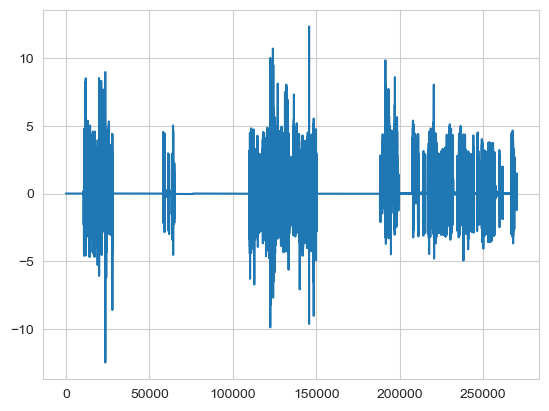

In [6]:
plt.plot(mFV)